## 1.3 Adding objects to the scene
Librat used the wavefront <code><span style="background-color:lightgrey">.obj</span></code> format.  More information on the wavefront format can be accessed <a href=>here</a>.

In [3]:
from __future__ import print_function, division
import os
from run_start import *
from hips import hips2img, hipstats
import matplotlib.pyplot as plt
%matplotlib inline

## Wavefront object syntax
There are a number of different syntax that can be utilised to define an object.  The previous example looks like this:</p>
<code>
    mtllib materials.matlib
    !{
    usemtl white
    v 0 0 0
    v 0 0 1
    plane -1 -2
    !}
    !{
    usemtl white
    v 0 0 1000
    ell -1 30000 30000 1000
    !}
</code>
### Materials library
Before any objects can be defined a materials library is specified, this is defined by the line <code>mtllib materials.matlib</code> where the materials (or reference to them) are stored in <code><span style="background-color:lightgrey">materials.matlib</span></code>.  The contents of this looks like:</p>
<code>
    srm white materials/white.dat
    srm soil materials/soil.dat
    srm leaf materials/leaf.dat
    ...
</code>
<p>Using the top line as an example, srm (standard reflectance material - Lambertian reflectance (and/or transmittance) defines a single material named <code>white</code>. The (ASCII) file giving the spectral reflectance function is located at <code><span style="background-color:lightgrey">materials/white.dat</span></code>. 

<p>The file <code><span style="background-color:lightgrey">materials/white.dat</span></code> contains 2 columns: column 1 is wavelength, column 2 is reflectance for that wavelength (wavelength units are arbitrary, but we usually use nm). In this case, the file specifies:</p>
<code>
    0 1 
    10000 1
</code>
<p>which is a reflectance of 1.0 for any wavelength (less than or equal to an arbitrary upper limit 10000). If the file specifies transmittance as well, this is given as a third column.</p> 
 
### Defining a plane
<p>The fields <code>!{</code> and <code>!}</code> specifiy that a bounding box should be placed around objects contained within the brackets. This allows for efficient intersection tests in the ray tracing. Normally, the ground plane is defined first:</p>
<code>
    !{
    usemtl white
    v 0 0 0 <span style="color:green"><i># this is the instersection <b>I</b> vector</i></span> 
    v 0 0 1 <span style="color:green"><i># this is the direction <b>N</b> vector</i></span> 
    plane -1 -2 <span style="color:green"><i># an infinited plane that refers (relatively) to the previous to lines </span> 
    !}
</code>
<p>Using the <code>usemtl</code> field, we specify the material <code>white</code>.  Next the <code>v</code> lines denotes a vertex (vector) (as in the <a href=https://en.wikipedia.org/wiki/Wavefront_.obj_file>standard wavefront format</a>) which requires 3 numbers to be given after the v giving the {x,y,z} coordinates of the vector. Note that <code>v</code> fields can specify a location or direction vector. The field <code>plane</code> specifies a scene object. <code>plane</code> is an infinite planar object. It is defined by an intersection point (location vector) <b>I</b> and a direction vector <b>N</b>. These vectors need to be defined before a call is made to the object, so in this case, we define <b>I</b> as <code>0 0 0</code> and <b>N</b> as <code>0 0 1</code> i.e. an x-y plane at z=0.</p>

<p>Thus <code>plane -1 -2</code> means:
    <i>define a plane with <b>N</b> given by the previous specified vector (<code>-1</code>) that goes through <b>I</b> given by the second to last specified vector(<code>-2</code>)</i>.

Lets define a Python function for quickly evaluating .obj code blocks

In [4]:
def run_code(code):
    # writes code string to temporary file
    with open('obj/obj_example.obj', 'w') as O:
        O.write(code)

    # runs start
    cmd = "echo 16 0 0 50000 150000 150000 216 216 1 output/obj_example.hips | \
           start obj/obj_example.obj"
    error = run_start(cmd)

    # displays hips image output
    if not error:
        hips2img('output/obj_example.hips', stretch=False)

This can then be executed as below 

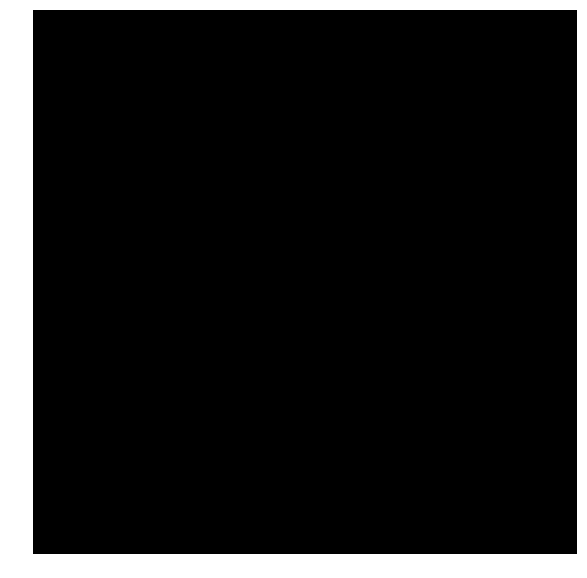

In [5]:
code = """
mtllib materials.matlib
!{
usemtl white
v 0 0 0
v 0 0 1
plane -1 -2
!}
"""
run_code(code)
# the below image is all black because it is a height map of a flat surface!

### Adding a slope
We can add a slope to the "ground" surface by changing the definition to</p>
<code>
    !{
    usemtl white
    v 0 0 0
    v 0 1 2
    plane -1 -2
    }!
</code>
<p>Here we have now defined the second <b>N</b> vector to have direction <code>0 1 2</code>.  This look like this:

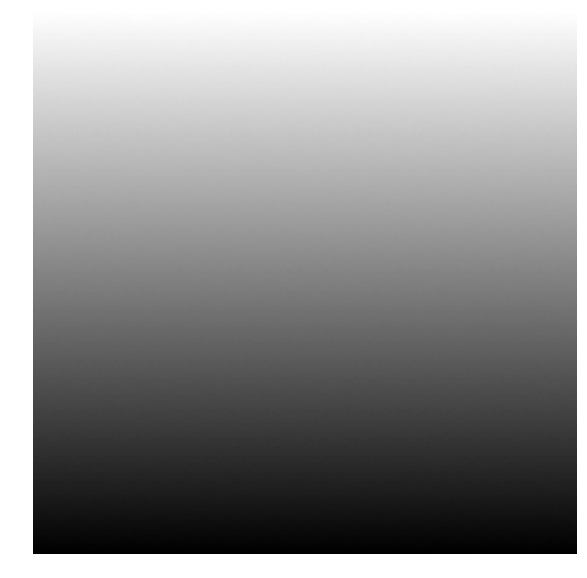

[-37499.207, 37499.02, 0.25994512, 21650.945]


In [6]:
code = """
mtllib materials.matlib
!{
usemtl white
v 0 0 0
v 0 1 2
plane -1 -2
!}
"""
run_code(code)

# we can also print some stats from this surface
print(hipstats('output/obj_example.hips')) # min, max, mean, sd

## Adding the <code><span style="background-color:lightgrey">sphere.obj</span></code> to our scene
In the <a href=1.2_simple_sphere_example.ipynb>previous section</a> there was a single sphere in the scene.  This achieved using:</p>
<code>
    !{
    usemtl white
    v 0 0 1000
    ell -1 30000 30000 1000
    !}
</code>
<p>Again we have specified material <code>white</code>. Here the <code>ell</code> is an ellipsoid object that refers to the previous line. Its description requires definition of: (i) the base (N.B. not the centre) of the ellipsoid (<code>-1</code> here, meaning the previously-defined vector - <code>0 0 1000</code> in this case); (ii) the semi-axis lengths in x,y,z directions (<code>30000 30000 1000</code> here).
so:</p>
<code>
    v 0 0 1000 
    ell -1 30000 30000 1000
</code>
<p>is in fact a spheroid of x-y semi-axis length <code>30000</code> units (arbitrary linear units) and z-semi-axis length <code>1000</code> units: a prolate spheroid that extends from -30000 to 30000 in the x- and y-directions and from 1000 to 3000 in the z-direction.

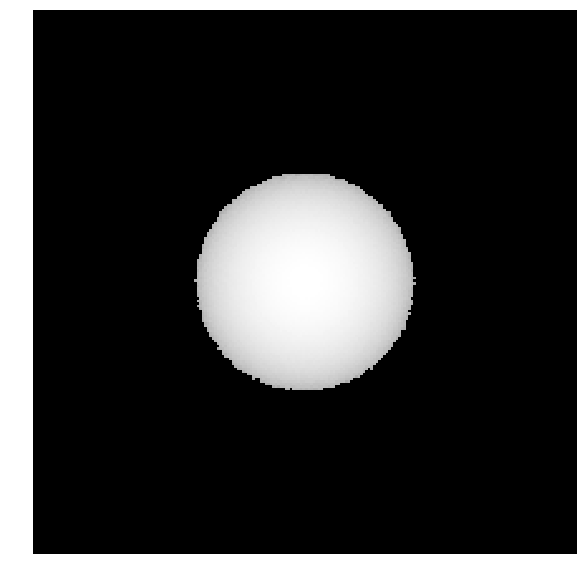

In [7]:
code = """
mtllib materials.matlib
# the ground
!{
usemtl white
v 0 0 0
v 0 0 1
plane -1 -2
!}
# the sphere
!{ 
usemtl white
v 0 0 1000
ell -1 30000 30000 1000
!}
"""
run_code(code)
# now add a slope to the ground surface

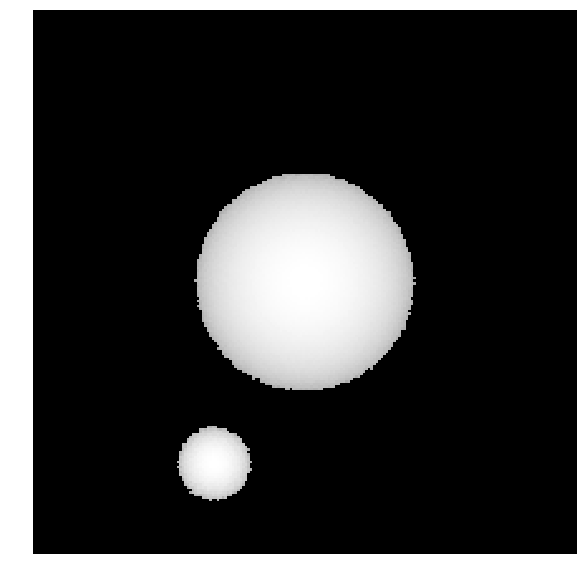

In [8]:
# in this example there are two spheres
code = """
mtllib materials.matlib
# the ground
!{
usemtl white
v 0 0 0
v 0 0 1
plane -1 -2
!}
# the sphere
!{ 
usemtl white
v 0 0 1000
ell -1 30000 30000 1000
!}
# the second sphere
!{ 
usemtl white
v 25000 50000 1000 # offset from the middle
ell -1 10000 10000 1000 # smaller dimensions
!}
"""
run_code(code)

## Cloning objects

We can keep adding more objects to the scene, however if they are the same e.g. many spheres, then a more efficient method is to define <code>g</code> an object and then <code>clone</code> it.</p>
<code>
    !{ 
    \# define <span style="color:green"><i># this line is just a comment</i></span> 
    g object_name <span style="color:green"><i># define an object named "object_name"</i></span> 
    usemtl stem <span style="color:green"><i># using material stem</i></span> 
    v 0 0 0 <span style="color:green"><i># the <b>I</b> vector defining the intersection</i></span> 
    v 0 10000 0 <span style="color:green"><i># the <b>N</b> vector defining the direction</i></span> 
    cyl -1 -2 5000 <span style="color:green"><i>a cylinder object with circumference 5000 units</i></span> 
    !}
    !{
    clone 0 0 0 0 object_name
    !}
</code>

Note that comments can be added using #.  This produces a cylinder object, this is then cloned using the line:</p>
<code>
    clone x y z azimuth object_name
</code>

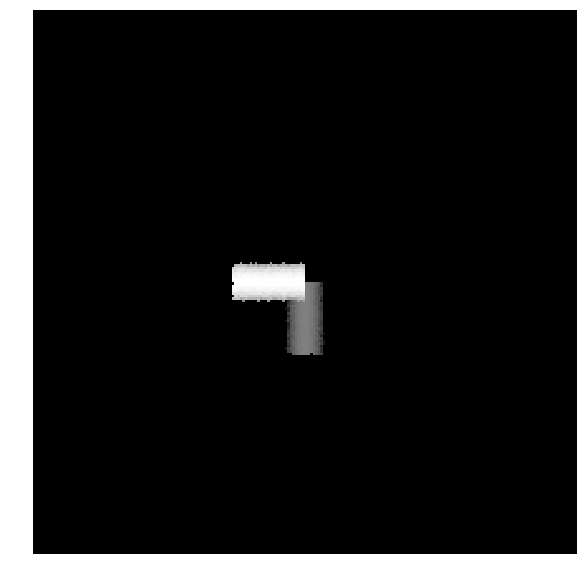

In [9]:
# in this example we clone two cylinders and orientate one at -90 degress 
# azimuth and altitude (z) 5000 units
code = """
mtllib materials.matlib
!{
v 0 0 0
v 0 0 1
usemtl soil
plane -1 -2 
!} # this is the ground this time using the soil material 
!{
# define
g cylinder_object
usemtl stem
v 0 0 0
v 0 20000 0 
cyl -1 -2 5000
!}
!{
clone 0 0 0 0 cylinder_object
clone 0 0 5000 -90 cylinder_object
!}
"""
run_code(code)

We can add more objects to the object to be cloned.  Here we define a forest of lollipops-on-sticks trees. Obviously creating a height map means we can't see the stems though! But we may use this object file in a later example. 

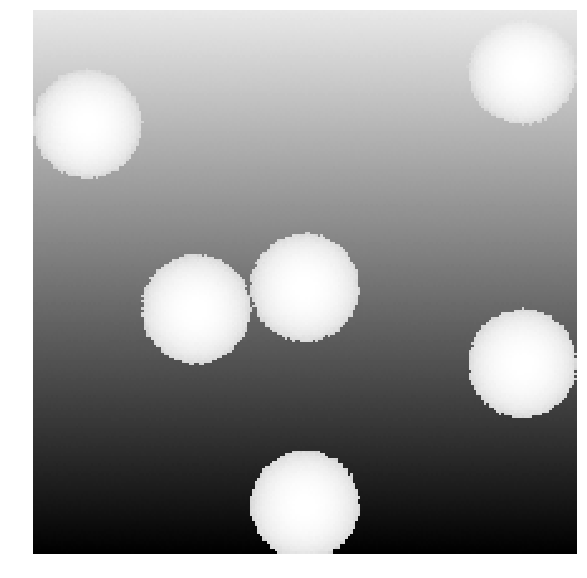

In [10]:
code = """
mtllib materials.matlib
!{
v 0 0 0
v 0 .5 1
usemtl soil
plane -1 -2 
!}
!{
g tree
usemtl stem
v 0 0 0
v 0 .5 10
cyl -1 -2 2
usemtl leaf
sph -1 5 # a sphere object defining radius
!}
!{
clone 0 0 0 0 tree
clone 10 2 0 0 tree
clone -20 7 0 0 tree
clone 20 -15 0 0 tree
clone 0 20 0 0 tree
clone -20 -20 0 0 tree
!}
"""

# writes code string to temporary file
with open('obj/lollipops-on-sticks.obj', 'w') as O:
    O.write(code)

cmd = "echo 16 0 0 200 50 50 216 216 1 output/lollipops-on-sticks.hips | \
       start obj/lollipops-on-sticks.obj"
error = run_start(cmd)

# displays hips image output
if not error:
    hips2img('output/lollipops-on-sticks.hips', stretch=False)

There are a number of other examples in $BPMS/src/lib/rat/element_types.h